In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

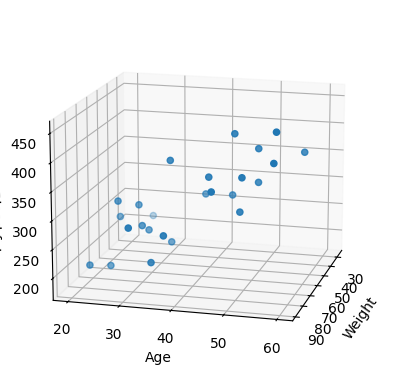

In [43]:
raw_data = np.genfromtxt('../../00.Data/07.ML/data/x09.txt', skip_header=36)

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [46]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)
y_data = y_data.reshape((25,1))
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,)),
])
model.compile(optimizer='rmsprop', loss='mse')

In [56]:
hist = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 45150.2695
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 45104.8359
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 45059.4141
Epoch 4/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 45014.0312
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 44968.6602
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 44923.3203
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 44878.0000
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 44832.7031
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 44787.4336
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 44742.1875
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 44696.9688
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 44651.7734
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 44606.6055
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 44561.4492
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 44516.3359
Epoch 16/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 44471.2344
Epoch 17/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 44426.1602
Epoch 18/1000
1/1 ━━━━━━━

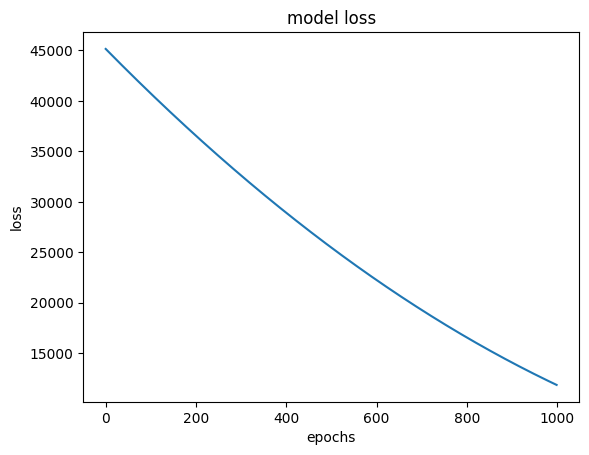

In [57]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [58]:
model.predict(np.array([100,44]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[275.23352]], dtype=float32)

In [59]:
model.get_weights()

[array([[1.5075635],
        [2.7949286]], dtype=float32),
 array([1.5003147], dtype=float32)]

In [60]:
W_, b_ = model.get_weights()
print('Weight is : ', W_)
print('bias is : ', b_)

Weight is :  [[1.5075635]
 [2.7949286]]
bias is :  [1.5003147]


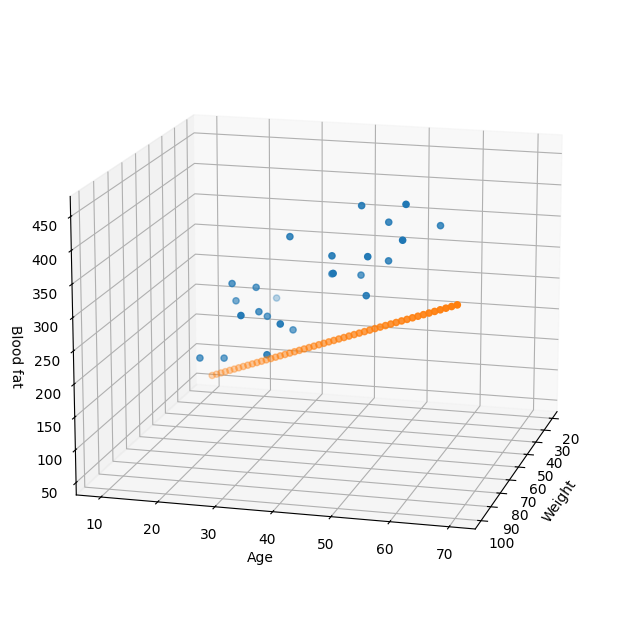

In [61]:
x = np.linspace(20,100,50).reshape(50,1)
y = np.linspace(10,70,50).reshape(50,1)
X = np.concatenate((x,y), axis=1)
Z = np.matmul(X, W_) + b_

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [62]:
X = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]])
y = np.array([[0], [1], [1], [0]])

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

In [64]:
hist = model.fit(X, y, epochs=5000, batch_size=1)

Epoch 1/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2314  
Epoch 2/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1991 
Epoch 3/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2069 
Epoch 4/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3406 
Epoch 5/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3139 
Epoch 6/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2475 
Epoch 7/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2142 
Epoch 8/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3152 
Epoch 9/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2440 
Epoch 10/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2716 
Epoch 11/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2806 
Epoch 12/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2678 
Epoch 13/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2697 
Epoch 14/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2201
Epoch 15/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2478 
Epo

In [65]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


array([[0.07924549],
       [0.6638511 ],
       [0.66385   ],
       [0.6725696 ]], dtype=float32)

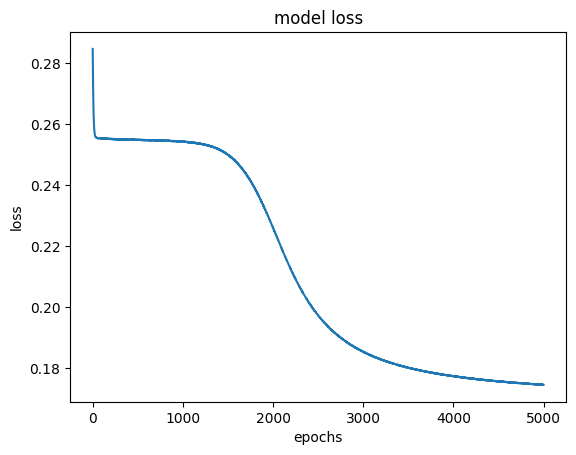

In [66]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [67]:
for w in model.weights :
    print('---')
    print(w)

---
<KerasVariable shape=(2, 2), dtype=float32, path=sequential_7/dense_8/kernel>
---
<KerasVariable shape=(2,), dtype=float32, path=sequential_7/dense_8/bias>
---
<KerasVariable shape=(2, 1), dtype=float32, path=sequential_7/dense_9/kernel>
---
<KerasVariable shape=(1,), dtype=float32, path=sequential_7/dense_9/bias>


# Iris Data

In [68]:
from sklearn.datasets import load_iris
iris = load_iris()

x=iris.data
y=iris.target

In [69]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [70]:
enc.categories_

[array([0, 1, 2])]

In [71]:
y_onehot = enc.transform(y.reshape(len(y), 1))

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_onehot, test_size=0.2, random_state=50)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4, ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/home/han/venv/ML/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,371 (9.26 KB)

 Trainable params: 2,371 (9.26 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
hist = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step - accuracy: 0.3281 - loss: 1.1662
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3867 - loss: 1.0597 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3606 - loss: 1.0185 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3315 - loss: 0.9985 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3048 - loss: 0.9828 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4465 - loss: 0.9375 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6679 - loss: 0.8983 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6733 - loss: 0.8593 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6608 - loss: 0.8346 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6692 - loss: 0.7989 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6869 - loss: 0.7545 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6390 - lo

In [75]:
model.evaluate(x_test, y_test, verbose=2)

1/1 - 0s - 388ms/step - accuracy: 0.9667 - loss: 0.1002


[0.10024769604206085, 0.9666666388511658]

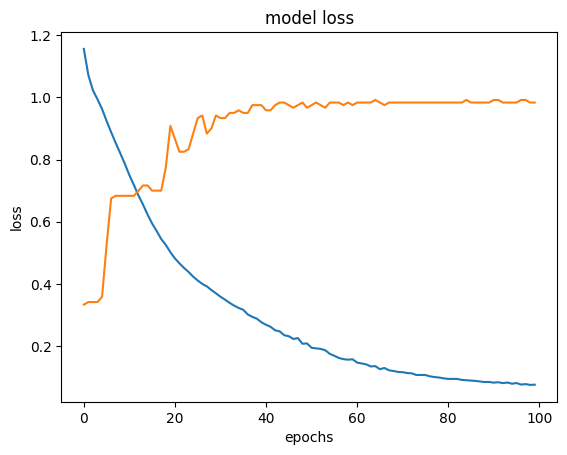

In [76]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()